# Lab #2: Logistic Regression

- Implementar el método de Newton
- Implementar regresión logística
- Aplicar a datos de Iris y comparar:
  - Gradiente descendente batch
  - Gradiente descendente mini-batch (20)
  - Método de Newton
- Reportar valor de función objetivo $J(\theta)$ encontrada para uno con respecto al número de iteraciones

## 1. Limpieza de datos
Preparación de datos para regresión logística binaria. En este caso, utilizaremos solo dos clases:
1. Setosa
2. Versicolor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

In [2]:
df = pd.read_csv('iris.csv')
print(f'With Virginica: {df.shape[0]} elements')
virginica_idxs = list(df[df['iris_class'] == 'Iris-virginica'].index)
df = df.drop(virginica_idxs)
print(f'Without Virginica: {df.shape[0]} elements')
df['iris_class'] = LabelEncoder().fit_transform(df['iris_class'])
df.head()

With Virginica: 150 elements
Without Virginica: 100 elements


,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


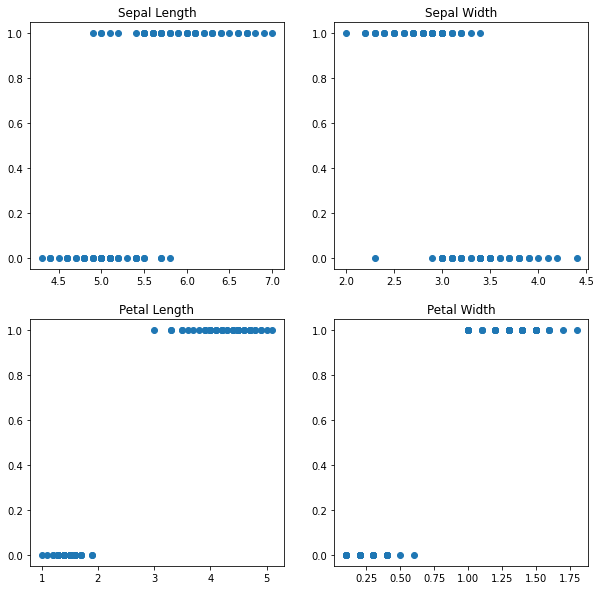

In [3]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axis[0,0].scatter(x=df['sepal_length'], y=df['iris_class'])
axis[0,0].set_title('Sepal Length')

axis[0,1].scatter(x=df['sepal_width'], y=df['iris_class'])
axis[0,1].set_title('Sepal Width')

axis[1,0].scatter(x=df['petal_length'], y=df['iris_class'])
axis[1,0].set_title('Petal Length')

axis[1,1].scatter(x=df['petal_width'], y=df['iris_class'])
axis[1,1].set_title('Petal Width')

plt.show()

In [4]:
X = np.array([
    np.repeat(1, df.shape[0]),
    df.iloc[:, 0],
    df.iloc[:, 1],
    df.iloc[:, 2],
    df.iloc[:, 3],
]).T
y = df.iloc[:, -1]
print(f'X: {X.shape}\t y:{y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'X_train: {X_train.shape} y_train:{y_train.shape}')
print(f'X_test: {X_test.shape}  y_test:{y_test.shape}')

X: (100, 5)	 y:(100,)
X_train: (80, 5) y_train:(80,)
X_test: (20, 5)  y_test:(20,)


In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
pd.DataFrame(clf.coef_.T)

,0
0,0.000020
1,0.440551
2,-0.901553
3,2.310482
4,0.967711


## 2. Regresión Logística

In [6]:
pd.DataFrame(X,y)

,0,1,2,3,4
iris_class,,,,,
0,1.0,5.1,3.5,1.4,0.2
0,1.0,4.9,3.0,1.4,0.2
0,1.0,4.7,3.2,1.3,0.2
0,1.0,4.6,3.1,1.5,0.2
0,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
1,1.0,5.7,3.0,4.2,1.2
1,1.0,5.7,2.9,4.2,1.3
1,1.0,6.2,2.9,4.3,1.3


In [14]:
def sigmoid(eta):
    return 1 / (1 + np.exp(-eta))
    
def cost(X, y, theta):
    return -(y@np.log(sigmoid(X@theta))) - ((1-y)@np.log(sigmoid(X@theta)))

def gradient(X, y, theta):
    return X.T@(sigmoid(X@theta) - y)

def hessian(X, y, theta):
    return X.T@np.diag(sigmoid(X@theta))@X

def newton(X, y, theta, n_iter=5):
    n_theta = None
    for i in range(int(n_iter)):
        Sk = np.diag(sigmoid(X@theta))
        n_theta = np.linalg.inv(hessian(X, y, theta))@X.T@(Sk@X@theta + y - sigmoid(X@theta))
        print(f'Cost at iteration #{i+1}: {cost(X, y, n_theta)}')
        theta = n_theta
    return n_theta

def batch(X, y, theta, eta, n_iter=5):
    n_theta = None
    for i in range(int(n_iter)):
        n_theta = theta + eta*X.T@(y-X@theta)
        print(f'Cost at iteration #{i+1}: {cost(X, y, n_theta)}')
        theta = n_theta
    return n_theta

def mini_batch(X, y, theta, eta):
    return batch(X, y, theta, eta, n_iter=20)



In [15]:
theta = np.zeros(5)
newton(X, y, theta)

Cost at iteration #1: 80.84755767871661
Cost at iteration #2: 114.98049593869231
Cost at iteration #3: 153.94643614921247
Cost at iteration #4: 190.21776379117807
Cost at iteration #5: 217.84931029482647


array([ 0.90444675, -0.31615088, -1.6404218 ,  1.07774216,  2.14942965])

In [10]:
theta = np.array([1,1,1,1,1])
batch(X, y, theta, eta=0.1)

Cost at iteration #1: nan
Cost at iteration #2: -0.0
Cost at iteration #3: nan
Cost at iteration #4: -0.0
Cost at iteration #5: nan


<ipython-input-7-73b438ca71e2>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-eta))
<ipython-input-7-73b438ca71e2>:5: RuntimeWarning: divide by zero encountered in log
  return -(y@np.log(sigmoid(X@theta))) - ((1-y)@np.log(sigmoid(X@theta)))


array([-8.10559855e+12, -4.50884180e+13, -2.49152565e+13, -2.47989558e+13,
       -6.97851752e+12])

In [11]:
theta = np.array([1,1,1,1,1])
mini_batch(X, y, theta, eta=0.1)

Cost at iteration #1: nan
Cost at iteration #2: -0.0
Cost at iteration #3: nan
Cost at iteration #4: -0.0
Cost at iteration #5: nan
Cost at iteration #6: -0.0
Cost at iteration #7: nan
Cost at iteration #8: -0.0
Cost at iteration #9: nan
Cost at iteration #10: -0.0
Cost at iteration #11: nan
Cost at iteration #12: -0.0
Cost at iteration #13: nan
Cost at iteration #14: -0.0
Cost at iteration #15: nan
Cost at iteration #16: -0.0
Cost at iteration #17: nan
Cost at iteration #18: -0.0
Cost at iteration #19: nan
Cost at iteration #20: -0.0


<ipython-input-7-73b438ca71e2>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-eta))
<ipython-input-7-73b438ca71e2>:5: RuntimeWarning: divide by zero encountered in log
  return -(y@np.log(sigmoid(X@theta))) - ((1-y)@np.log(sigmoid(X@theta)))


array([2.68628405e+53, 1.49427951e+54, 8.25718864e+53, 8.21864531e+53,
       2.31275707e+53])